In [1]:
import pickle
import requests
import numpy as np
from os import path
import tensorflow as tf
from PIL import Image
from StringIO import StringIO
from string import lowercase, digits

In [2]:
charset = digits + lowercase
charset

'0123456789abcdefghijklmnopqrstuvwxyz'

In [3]:
def imageToVertor(image):
    """ 将图片转化为向量表示 """
    width = image.width
    height = image.height
    image = image.convert("L")
    image = np.asarray(image)
    image = image.reshape([width * height]) / 255
    return image

In [4]:
index = 1

In [5]:
session=tf.Session()    
modelPath = '/tmp' 
modelName = tf.train.latest_checkpoint(modelPath)

In [6]:
print u'modelPath:', modelPath
print u'modelName:', modelName

modelPath: /tmp
modelName: /tmp/model.ckpt


In [7]:
modelName + '.meta'

u'/tmp/model.ckpt.meta'

In [8]:
# saver = tf.train.import_meta_graph(modelName + '.meta')
saver = tf.train.import_meta_graph('/tmp/model.ckpt.meta')
# saver.restore(session, modelName)
saver.restore(session, '/tmp/model.ckpt')
nodes = pickle.load(open(path.join(modelPath, 'nodes.pk'), "rU" ))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


In [10]:
graph = tf.get_default_graph()
x = graph.get_tensor_by_name(nodes['x'])
prediction = graph.get_tensor_by_name(nodes['prediction'])
keep_prob = graph.get_tensor_by_name(nodes['keep_prob'])
output_layer_weight = graph.get_tensor_by_name(nodes['output_layer_weight'])

In [7]:
# x = session.graph.get_tensor_by_name(nodes['x'])
# prediction = session.graph.get_tensor_by_name(nodes['prediction'])
# keep_prob = session.graph.get_tensor_by_name(nodes['keep_prob'])

In [24]:
url = 'https://s.nacao.org.cn/servlet/ValidateCode?time='
response = requests.get(url)
image = Image.open(StringIO(response.content))

prediction: ['8']


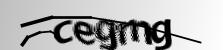

In [26]:
imageList = [image]
x_data = map(imageToVertor, imageList)
p = session.run(prediction, feed_dict={x: x_data, keep_prob: .75})
print 'prediction:', map(lambda x: charset[x], p[0])
image

In [11]:
w = session.run(output_layer_weight)

In [13]:
w.sum()

-514.7832